# Time Series Forecasting Methods in Python

This notebook demonstrates 11 different classical time series forecasting methods; these are:
 

- Autoregression (AR)
- Moving Average (MA)
- Autoregressive Moving Average (ARMA)
- Autoregressive Integrated Moving Average (ARIMA)
- Seasonal Autoregressive Integrated Moving-Average (SARIMA)
- Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
- Vector Autoregression (VAR)
- Vector Autoregression Moving-Average (VARMA)
- Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
- Simple Exponential Smoothing (SES)
- Holt Winter’s Exponential Smoothing (HWES)

Related article [here](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/).

### что я тут хочу

- понять что за графики и как ими пользоватьсяAdd aitocorrelation plot / plot acf
- покащзать как отрабатывают основные алгоритмы из коробки 
- показать финальное сравнение на нескольких видах распределений
- в супер идеале лаконично пояснить как реализуется каждый из методов, написать простыми. словами
- также хорошо бы добавить формулы

## Imports

In [20]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Autoregression (AR)

AR(p) - авторегрессионная модель порядка p моделирует следующий шаг в последовательности как линейную функцию наблюдения на предыдущих временных шагах. Подходит для одномерных временных рядов без трендовых и сезонных состовляющих.

Как работает? 
- Модель строит линейную регрессию (аналитическое решение);
- В качестве признака p предыдущих значений, p - параметр модели;

---

In [2]:
# Моя реализация
def AR(data: list, p: int) -> float:
    
    # составляем матрицу признаков
    X = []
    X.append(np.ones(len(data) - p))
    for i in range(p):
        X.append(np.array(data[i: -p+i])) 
    X = np.array(X, dtype=object).T
    
    y = data[p: ]
    X = np.array(X, dtype=float)
    
    coef = np.linalg.inv(X.T @ X) @ X.T @ y
    res = np.append(np.array([1]), np.array(data[-p: ])) @ coef
    
    return res

---

In [3]:
x_min, x_max = 1, 100
np.random.seed(1009)
data = [x + np.random.normal(loc=0, scale=13) for x in range(x_min, x_max+1)]

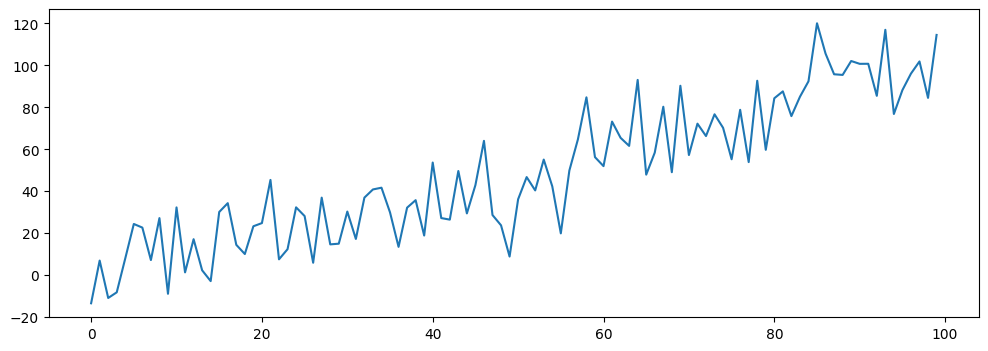

In [4]:
plt.figure(figsize=(12, 4))
sns.lineplot(data)
plt.show()

In [5]:
pred_1 = AR(data, 1)
pred_5 = AR(data, 5)

In [6]:
pred_1, pred_5

(102.94611131333214, 95.46063024564594)

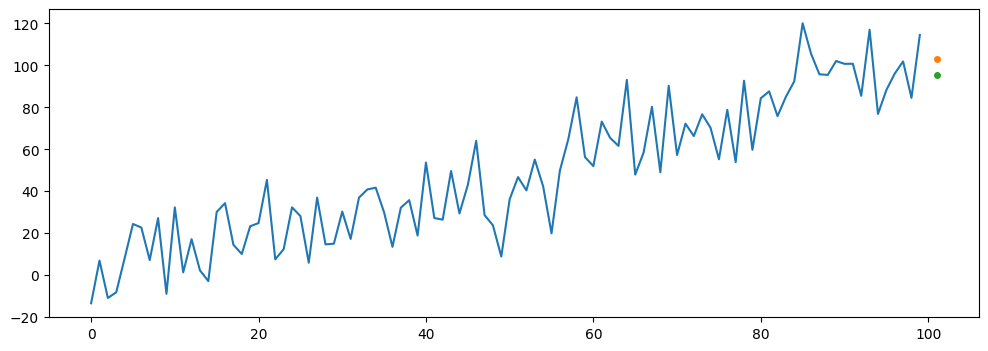

In [7]:
plt.figure(figsize=(12, 4))
sns.lineplot(data)
plt.plot(x_max+1, pred_1, 'o', ms=4)
plt.plot(x_max+1, pred_5, 'o', ms=4)
plt.show()

In [29]:
# Пакет statsmodels 
from statsmodels.tsa.ar_model import AutoReg

pred_1 = AutoReg(data, lags=1).fit().predict(len(data), len(data))
pred_5 = AutoReg(data, lags=5).fit().predict(len(data), len(data))

In [30]:
pred_1, pred_5

(array([102.94611131]), array([95.46063025]))

## Moving Average (MA)

MA(q) - метод скользящего среднего порядка q моделирует следующий шаг в последовательности как линейную функцию остаточных ошибок от среднего процесса на предыдущих шагах. Подходит для одномерных временных рядов без трендовых и сезонных состоявляющих.

---

In [10]:
x_min, x_max = 1, 100
np.random.seed(1009)
data = [x + np.random.normal(loc=0, scale=13) for x in range(x_min, x_max+1)]

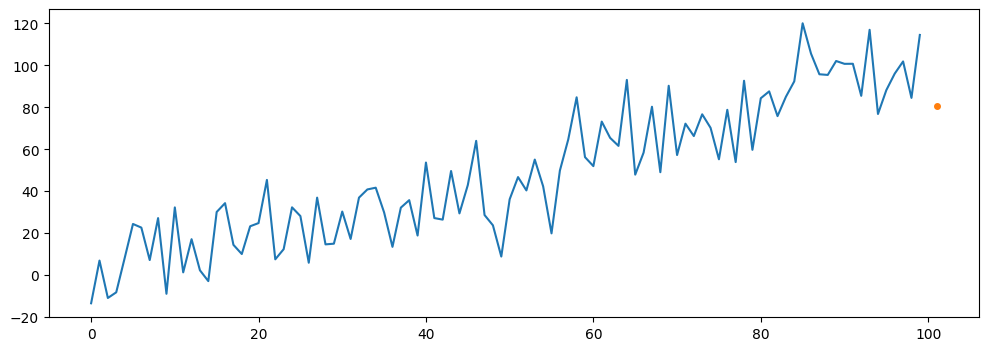

In [12]:
plt.figure(figsize=(12, 4))
sns.lineplot(data)
plt.plot(x_max+1, pred_1, 'o', ms=4)
plt.show()

In [22]:
# Мы можем использовать класс ARIMA для создания модели MA и установки модели AR нулевого порядка. Ууказываем порядок модели MA в аргументе order.
from statsmodels.tsa.arima.model import ARIMA

pred_1 = ARIMA(data, order=(0, 0, 1)).fit().predict(len(data), len(data))
pred_1

array([80.6779917])

## Autoregressive Moving Average (ARMA)

ARMA(p, q) - авторегрессионная модель скользящего среднего порядка (p, q) предсказывает следующий шаг как линейную функцию наблюдений и остаточных ошибок на предыдущих шагах. Сочетает в себе две предыдущие модели.

## Autoregressive Integrated Moving Average (ARIMA)

ARIMA(p, d, q) - интегрированная авторегрессионная модель скользящего среднего порядка (p, d, q) предсказывает следующий шаг как линейную функцию разностных наблюдений и остаточных ошибок. Включён этап получения разностей, чтобы сделать временной ряд стационарным.Подходит для данных с трендом и без сезонности.

## Seasonal Autoregressive Integrated Moving-Average (SARIMA)

SARIMA(p,d,q)(P,D,Q,m) — интегрированная модель сезонного авторегрессионного скользящего среднего, порядки тренда: (p, d, q), порядки сезонности: (P , D, Q, m). Моделирует оценки как линейную функцию разностных наблюдений, ошибок разностных сезонных наблюдений и сезонных ошибок на предыдущих шагах.

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

## Vector Autoregression (VAR)

VAR(vector AR) — векторная авторегрессия, обобщённая модель для предсказания нескольких временных рядов, где текущие значения зависят от предыдущих. Пример: цена на товары одной категории.

Vector Autoregression Moving-Average (VARMA)

VARMA (vector ARMA) — векторная авторегрессия скользящего среднего.

VARMAX (vector ARMA extended) — векторная модель с возможностью учёта внешних факторов.
